Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import re

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
#import xgboost as xgb
from xgboost import XGBClassifier

#Treating Imbalance
# Using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler #undersampling

#cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# evaluation metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, mean_absolute_error

# 2. Data Exploration

In [2]:
df_train0 = pd.read_csv("../Dev_data_to_be_shared.csv")
df_train = df_train0.copy()
df_train.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train.info()
df_train.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB


Index(['account_number', 'bad_flag', 'onus_attribute_1',
       'transaction_attribute_1', 'transaction_attribute_2',
       'transaction_attribute_3', 'transaction_attribute_4',
       'transaction_attribute_5', 'transaction_attribute_6',
       'transaction_attribute_7',
       ...
       'bureau_enquiry_47', 'bureau_enquiry_48', 'bureau_enquiry_49',
       'bureau_enquiry_50', 'onus_attribute_43', 'onus_attribute_44',
       'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47',
       'onus_attribute_48'],
      dtype='object', length=1216)

In [4]:
def count_columns_by_parameter(df):
  param_counts = {}
  for col in df.columns:
    # Extract the parameter name by finding the first underscore 
    # and checking for any alphabetic characters after it.
    match = re.match(r"([a-zA-Z_]+)", col) 
    if match:
      param = match.group(1)
      param_counts[param] = param_counts.get(param, 0) + 1 

  return param_counts

param_counts = count_columns_by_parameter(df_train)

print("Number of columns per parameter:")
for param, count in param_counts.items():
  print(f"{param}: {count}") 


Number of columns per parameter:
account_number: 1
bad_flag: 1
onus_attribute_: 48
transaction_attribute_: 664
bureau_: 452
bureau_enquiry_: 50


In [5]:
def count_columns_by_parameter(df):
  param_counts = {}
  for col in df.columns:
    # Extract the parameter name by finding the first underscore 
    # and checking for any alphabetic characters after it.
    match = re.match(r"([a-zA-Z_]+)", col) 
    if match:
      param = match.group(1)
      param_counts[param] = param_counts.get(param, 0) + 1 

  return param_counts

param_counts = count_columns_by_parameter(df_train)

print("Number of columns per parameter:")
for param, count in param_counts.items():
  print(f"{param}: {count}")

Number of columns per parameter:
account_number: 1
bad_flag: 1
onus_attribute_: 48
transaction_attribute_: 664
bureau_: 452
bureau_enquiry_: 50


2.1 Checking Imbalance

In [6]:
value_counts = df_train["bad_flag"].value_counts()
percentages = (value_counts / len(df_train)) * 100

print("Value Counts and Percentages:")
for value, count in value_counts.items():
    percentage = percentages[value]
    print(f"Value: {value}, Count: {count}, Percentage: {percentage:.2f}%") 

Value Counts and Percentages:
Value: 0, Count: 95434, Percentage: 98.58%
Value: 1, Count: 1372, Percentage: 1.42%


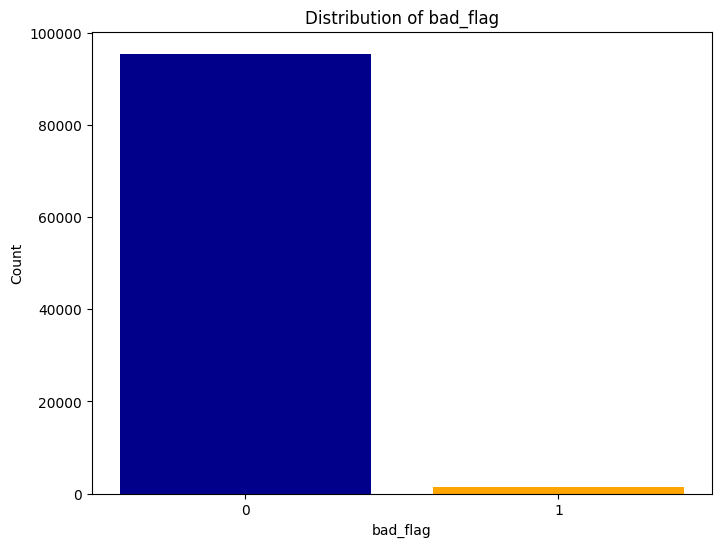

In [7]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts, color=['darkblue', 'orange'])
plt.xlabel("bad_flag")
plt.ylabel("Count")
plt.title("Distribution of bad_flag")
plt.xticks(value_counts.index) 
plt.show()

2.2 Checking Missing/Null Values

In [8]:
pd.set_option('display.max_rows', None)

In [9]:
print(df_train.isna().sum().apply(lambda x: f"{x} ({(x/len(df_train))*100:.2f}%)"))

account_number                     0 (0.00%)
bad_flag                           0 (0.00%)
onus_attribute_1              25231 (26.06%)
transaction_attribute_1       25231 (26.06%)
transaction_attribute_2       25231 (26.06%)
transaction_attribute_3       25231 (26.06%)
transaction_attribute_4       25231 (26.06%)
transaction_attribute_5       25231 (26.06%)
transaction_attribute_6       25231 (26.06%)
transaction_attribute_7       25231 (26.06%)
transaction_attribute_8       25231 (26.06%)
transaction_attribute_9       25231 (26.06%)
transaction_attribute_10      25231 (26.06%)
transaction_attribute_11      25231 (26.06%)
transaction_attribute_12      25231 (26.06%)
transaction_attribute_13      25231 (26.06%)
transaction_attribute_14      25231 (26.06%)
transaction_attribute_15      25231 (26.06%)
transaction_attribute_16      25231 (26.06%)
transaction_attribute_17      25231 (26.06%)
transaction_attribute_18      25231 (26.06%)
transaction_attribute_19      25231 (26.06%)
transactio

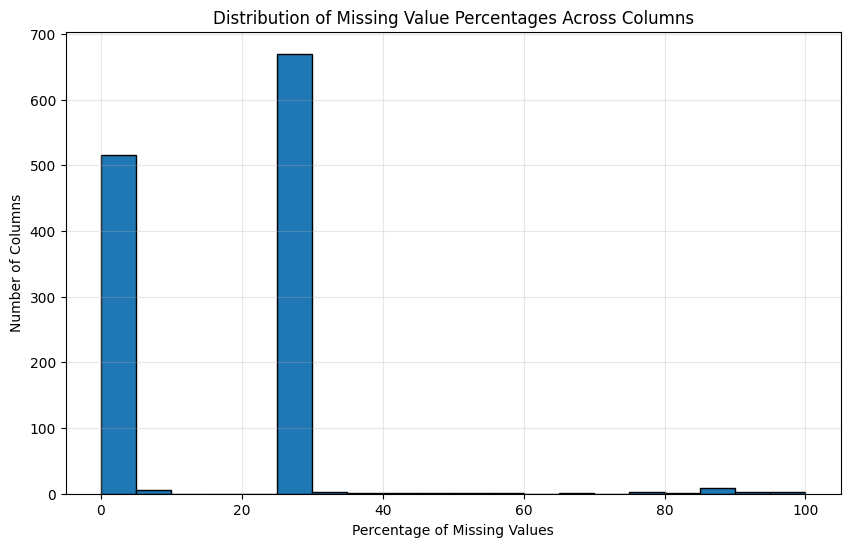

In [10]:
# Calculate percentage of missing values per column
missing_percentages = (df_train.isna().sum() / len(df_train)) * 100

# Create histogram
plt.figure(figsize=(10, 6))  
plt.hist(missing_percentages, bins=20, edgecolor='black') 
plt.title('Distribution of Missing Value Percentages Across Columns')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.grid(True, alpha=0.3)
plt.show()


2.3 Checking Outliers

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df_train.describe(percentiles = [0.05,0.25,0.5,0.75,0.8,0.85,0.95,0.99,0.995])

account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
5%        4841.250000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
80%      77445.000000      0.000000      2.200000e+05   
85%      82285.250000      0.000000      2.740000e+05   
95%      91965.750000      0.000000      4.500000e+05   
99%      95837.950000      1.000000      1.000000e+06   
99.5%    96321.975000      1.000000      1.309260e+06   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min                   0.000000                 0.000000   
5%                    0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
80%                   0.000000                 0.000000   
85%                   0.000000                 0.000000   
95%                   0.000000                 0.000000   
99%                   0.000000                 0.000000   
99.5%                 0.000000                 0.000000   
max              398936.791000                25.000000   

       transaction_attribute_3  transaction_attribute_4  \
count             71575.000000             71575.000000   
mean                  4.092854                77.306435   
std                 301.580599              3164.987013   
min                   0.000000           -109800.476600   
5%                    0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
80%                   0.000000                 0.000000   
85%                   0.000000                 0.000000   
95%                   0.000000                 0.000000   
99%                   0.000000                 0.000000   
99.5%                 0.000000                 0.000000   
max               55000.000000            358986.000000   

       transaction_attribute_5  transaction_attribute_6  \
count             71575.000000             71575.000000   
mean                  0.006315                67.043550   
std                   0.129545              2516.330899   
min                   0.000000             -3498.000000   
5%                    0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
80%                   0.000000                 0.000000   
85%                   0.000000                 0.000000   
95%                   0.000000                 0.000000   
99%                   0.000000                 0.000000   
99.5%                 0.000000                 0.000000   
max                  12.000000            358986.000000   

       transaction_attribute_7  transaction_attribute_8  \
count             71575.000000             71575.000000   
mean                  0.081034                 0.000210   
std                  14.203615                 0.034053   
min                   0.000000                 0.000000   
5%                    0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                  

# 3. Data Preprocessing

3.1 Handling Missing Values

In [13]:
# Calculate percentage of missing values per column
missing_percentages = (df_train.isna().sum() / len(df_train)) * 100

# Identify columns to drop (more than 40% missing)
columns_to_drop = missing_percentages[missing_percentages > 40].index


# Print information about dropped columns (optional)
if not columns_to_drop.empty:
    print("Columns dropped due to >40% missing values:")
    print(columns_to_drop.tolist())
    print(f"Number of columns dropped: {len(columns_to_drop)}")
else:
    print("No columns had more than 40% missing values.")

print("\nShape of original df_train:", df_train.shape)

#Demonstration using inplace=True
df_train.drop(columns=columns_to_drop, inplace=True)
print("\nShape of original df_train after using inplace=True:", df_train.shape)

Columns dropped due to >40% missing values:
['bureau_148', 'bureau_433', 'bureau_434', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'bureau_451', 'onus_attribute_7', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']
Number of columns dropped: 21

Shape of original df_train: (96806, 1216)

Shape of original df_train after using inplace=True: (96806, 1195)


In [14]:
for column in df_train.columns:
    if column.startswith('transaction_attribute'):
        df_train[column] = df_train[column].fillna(0)  # Assuming no transaction
    elif column.startswith('onus_attribute'):
        df_train[column] = df_train[column].fillna(df_train[column].median()) 
    elif column.startswith('bureau'):
        df_train[column] = df_train[column].fillna(0)  # Assume no credit history
    elif column.startswith('bureau_enquiry'):
        df_train[column] = df_train[column].fillna(0)  # Assume no inquiries

In [15]:
# Spliting into X and y
y=df_train.pop('bad_flag')
X = df_train.drop('account_number', axis=1)
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1193 entries, onus_attribute_1 to bureau_enquiry_50
dtypes: float64(1168), int64(25)
memory usage: 881.1 MB


Splitting the dataset

In [16]:
#Spiliting data set into train and test using strtify= y as the data set is highly imbalanced

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.8, random_state = 100,stratify=y) #stratitify y as the data set is highly imbalanced

In [17]:
#Variations of different classes in train & test data set

print('Train data : \n',(y_train.value_counts()/len(y_train))*100,'\n \n')
print('Test data : \n',(y_test.value_counts()/len(y_test))*100)

Train data : 
 bad_flag
0    98.582201
1     1.417799
Name: count, dtype: float64 
 

Test data : 
 bad_flag
0    98.584857
1     1.415143
Name: count, dtype: float64


# 4. Feature Engineering

4.1 Implementing PCA

In [18]:
# Identify transaction attributes
transaction_cols = [col for col in X.columns if col.startswith('transaction_attribute')]

# Robust Scaling on ALL data (train and test combined) for transaction columns ONLY
robust_scaler = RobustScaler()

# Scale the transaction columns in training data
X_train[transaction_cols] = robust_scaler.fit_transform(X_train[transaction_cols])

# Scale the transaction columns in test data using the fitted scaler
X_test[transaction_cols] = robust_scaler.transform(X_test[transaction_cols])


# PCA
n_pca_components = 50
pca = PCA(n_components=n_pca_components, random_state=42)
X_train_pca_transaction = pca.fit_transform(X_train[transaction_cols])
X_test_pca_transaction = pca.transform(X_test[transaction_cols])

X_train_pca_transaction = pd.DataFrame(X_train_pca_transaction, index=X_train.index, columns=[f'pca_transaction{i}' for i in range(n_pca_components)])
X_test_pca_transaction = pd.DataFrame(X_test_pca_transaction, index=X_test.index, columns=[f'pca_transaction{i}' for i in range(n_pca_components)])

In [19]:
X_train = pd.concat([X_train.drop(transaction_cols, axis=1), X_train_pca_transaction], axis=1)
X_test = pd.concat([X_test.drop(transaction_cols, axis=1), X_test_pca_transaction], axis=1)

print("Shape of X_train after pca:", X_train.shape)
print("Shape of X_test after pca:", X_test.shape)

Shape of X_train after pca: (77444, 579)
Shape of X_test after pca: (19362, 579)


In [22]:
#pd.reset_option('display.max_columns', None)
check =pd.DataFrame(X_train)
check.head()
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77444 entries, 20836 to 93964
Columns: 579 entries, onus_attribute_1 to pca_transaction49
dtypes: float64(554), int64(25)
memory usage: 342.7 MB


Scaling the data

In [23]:
# Create the RobustScaler
robust_scaler = RobustScaler()

# Scale the training data
X_train_scaled = robust_scaler.fit_transform(X_train)

X_train_scaled

array([[ 5.34246575e-01,  0.00000000e+00,  3.33333333e-01, ...,
         1.90482926e+00, -5.71293072e+01,  4.45528418e-02],
       [ 7.12328767e-01,  0.00000000e+00,  1.33333333e+00, ...,
        -1.41629721e-02, -6.05338944e-02,  1.59091395e-03],
       [-8.49315068e-01,  0.00000000e+00, -3.33333333e-01, ...,
         5.00509511e-01,  8.29717741e-01, -9.62207624e+00],
       ...,
       [ 3.83561644e-01,  0.00000000e+00,  6.66666667e-01, ...,
        -5.59747644e-01, -1.34315191e+00,  4.70314131e-01],
       [ 0.00000000e+00,  1.00000000e+00, -3.33333333e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.79452055e+00,  0.00000000e+00, -3.33333333e-01, ...,
        -1.85525300e+00,  6.70681378e+01, -1.20628737e+00]],
      shape=(77444, 579))

In [24]:
# Scale the test data using the same scaler fitted on training data
X_test_scaled = robust_scaler.transform(X_test)

# 5. Treating Imbalance

5.1 Random Undersampling

In [25]:
usm = RandomUnderSampler(random_state =25)

X_train_us,y_train_us = usm.fit_resample(X_train,y_train)

X_train_us =pd.DataFrame(X_train_us,columns = X_train.columns)

print('Shape of X_train after random undersampling : {}'.format(X_train_us.shape))
print('Shape of original X_train : {}'.format(X_train.shape))
# X_train_us.head()
# X_train_us


Shape of X_train after random undersampling : (2196, 579)
Shape of original X_train : (77444, 579)


# 6. Model Development

6.1 Random Forest

In [ ]:
# Random forest

# Hyperparameter tuning for random forest

param_rf = {
    'max_depth': [8,10],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split':range(50, 200, 50),
    'n_estimators': [100,150,200,300], 
    'max_features': [5, 10,15,20]
    
}

rf = RandomForestClassifier(n_jobs=-1,class_weight ='balanced',random_state=105)

folds= StratifiedKFold(n_splits = 3, shuffle = True, random_state = 90)
# Instantiate 
grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, 
                          cv = folds, n_jobs = -1,verbose = 1,scoring = 'roc_auc',random_state =100)


#fitting
grid_rf.fit(X_train_us,y_train_us)

In [ ]:
#best params

grid_rf.best_params_

In [26]:
#using best params

forest_cv = RandomForestClassifier(n_estimators=300,
                                   min_samples_split=100, min_samples_leaf=50,
                                   max_features=15,max_depth=10,
                                   n_jobs=-1,class_weight ='balanced',random_state=1055)

forest_cv.fit(X_train_us,y_train_us)


#prediction

pred_rf_train_cv= forest_cv.predict_proba(X_train_us)[:,1]
pred_rf_test_cv = forest_cv.predict_proba(X_test)[:,1]

y_pred = forest_cv.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_rf_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_rf_test_cv))

print(classification_report(y_test,y_pred))

forest_us_auc_test_cv = roc_auc_score(y_test,pred_rf_test_cv)
precision_rf_us_cv = precision_score(y_test,y_pred)
recall_rf_us_cv = recall_score(y_test,y_pred)
f1_rf_us_cv = f1_score(y_test,y_pred)

# Mean Absolute Error (MAE)
mae_rf_us_cv = mean_absolute_error(y_test, y_pred)
print('Test MAE score:', mae_rf_us_cv)

Train auc score :  0.8391030553979582
Test auc score :  0.8107233650063324
              precision    recall  f1-score   support

           0       1.00      0.69      0.81     19088
           1       0.03      0.78      0.07       274

    accuracy                           0.69     19362
   macro avg       0.52      0.74      0.44     19362
weighted avg       0.98      0.69      0.80     19362

Test MAE score: 0.3096271046379506


6.2 Stacking Model

In [ ]:
# Define base models
rf = RandomForestClassifier(n_estimators=300)
gb_clf = GradientBoostingClassifier(random_state=42)
svc_clf = SVC(probability=True, random_state=42)  # Enable probabilities for stacking
mlp_clf = MLPClassifier(random_state=42)

# Define meta-model
meta_model = LogisticRegression()

# Create StackingClassifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb_clf),
        ('svc', svc_clf),
        ('mlp', mlp_clf)
    ],
    final_estimator=meta_model,
    cv=5  # Cross-validation for meta-model training
)

# Train the stacking classifier
stacking_clf.fit(X_train_us, y_train_us)

# Evaluate on test data
y_test_pred = stacking_clf.predict(X_test)

# Evaluate on train data
y_train_pred = stacking_clf.predict(X_train_us)
y_train_pred_prob = stacking_clf.predict_proba(X_train_us)[:, 1]

# Evaluate on test data
y_test_pred = stacking_clf.predict(X_test)
y_test_pred_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Evaluation metrics for train set
print("\nTrain Accuracy: ", accuracy_score(y_train_us, y_train_pred))
# Evaluation metrics for test set
print("\nTest Accuracy: ", accuracy_score(y_test, y_test_pred))
# Print classification report for test set
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


# Calculate MAE for the test set
mae_xgb_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for stacking on test set:", mae_xgb_test)


6.3 XGBoost

In [ ]:
xgb= XGBClassifier(booster='gbtree',subsample=0.75,
                   n_estimators = 200,
                   max_depth = 8,
                   learning_rate=0.05,
                   n_jobs=-1,objective='binary:logistic', random_state=20,
                   reg_alpha=0.5, reg_lambda=1.5)   

xgb.fit(X_train_us,y_train_us)
#prediction 

pred_xgb_train_cv= xgb.predict_proba(X_train_us)[:,1]
pred_xgb_test_cv = xgb.predict_proba(X_test)[:,1]

y_pred = xgb.predict(X_test)
#score
print ( 'Train auc score : ', roc_auc_score(y_train_us,pred_xgb_train_cv))
print ( 'Test auc score : ', roc_auc_score(y_test,pred_xgb_test_cv))
print(classification_report(y_test,y_pred))


xgb_us_auc_test_cv = roc_auc_score(y_test,pred_xgb_test_cv)
precision_xgb_us_cv = precision_score(y_test,y_pred)
recall_xgb_us_cv = recall_score(y_test,y_pred)
f1_xgb_us_cv = f1_score(y_test,y_pred)


# Calculate MAE for the test set
mae_xgb_test = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) for XGBoost classifier on test set:", mae_xgb_test)


# 7. Prediction on Validation Data

In [ ]:
df_test0 = pd.read_csv("validation_data_to_be_shared.csv")

df_test = df_test0.copy()

df_test.head()

7.1 Handling Missing Values

In [ ]:
# Calculate percentage of missing values per column
missing_percentages = (df_test.isna().sum() / len(df_test)) * 100

# Identify columns to drop (more than 40% missing)
columns_to_drop = missing_percentages[missing_percentages > 40].index


# Print information about dropped columns (optional)
if not columns_to_drop.empty:
    print("Columns dropped due to >40% missing values:")
    print(columns_to_drop.tolist())
    print(f"Number of columns dropped: {len(columns_to_drop)}")
else:
    print("No columns had more than 40% missing values.")

print("\nShape of original df_test:", df_test.shape)

#Demonstration using inplace=True
df_test.drop(columns=columns_to_drop, inplace=True)
print("\nShape of original df_test after using inplace=True:", df_test.shape)

In [ ]:
for column in df_test.columns:
    if column.startswith('transaction_attribute'):
        df_test[column] = df_test[column].fillna(0)  # Assuming no transaction
    elif column.startswith('onus_attribute'):
        df_test[column] = df_test[column].fillna(df_test[column].median()) 
    elif column.startswith('bureau'):
        df_test[column] = df_test[column].fillna(0)  # Assume no credit history
    elif column.startswith('bureau_enquiry'):
        df_test[column] = df_test[column].fillna(0)  # Assume no inquiries

In [ ]:
df_test = df_test.drop('account_number', axis=1)

7.2 Implementing PCA

In [ ]:
# Identify transaction attributes
transaction_cols = [col for col in df_test.columns if col.startswith('transaction_attribute')]

# Robust Scaling on ALL data (train and test combined) for transaction columns ONLY
robust_scaler = RobustScaler()

# Scale the transaction columns in training data
# X_train[transaction_cols] = robust_scaler.fit_transform(X_train[transaction_cols])

# Scale the transaction columns in test data using the fitted scaler
df_test[transaction_cols] = robust_scaler.fit_transform(df_test[transaction_cols])


# PCA
n_pca_components = 50
pca = PCA(n_components=n_pca_components, random_state=42)
# X_train_pca_transaction = pca.fit_transform(X_train[transaction_cols])
df_test_pca_transaction = pca.fit_transform(df_test[transaction_cols])

#X_train_pca_transaction = pd.DataFrame(X_train_pca_transaction, index=X_train.index, columns=[f'pca_transaction{i}' for i in range(n_pca_components)])
df_test_pca_transaction = pd.DataFrame(df_test_pca_transaction, index=df_test.index, columns=[f'pca_transaction{i}' for i in range(n_pca_components)])

In [ ]:
#X_train = pd.concat([X_train.drop(transaction_cols, axis=1), X_train_pca_transaction], axis=1)
df_test = pd.concat([df_test.drop(transaction_cols, axis=1), df_test_pca_transaction], axis=1)

print("Shape of df_test after pca:", df_test.shape)
print("Shape of df_test before pca:", df_test0.shape)

7.3 Scaling the Data

In [ ]:
# Create the RobustScaler
robust_scaler = RobustScaler()

# Scale the training data
df_test_scaled = robust_scaler.fit_transform(df_test)

7.4 Prediction

In [ ]:
# test_predict = forest.cv()
pred_rf_df_test_cv = forest_cv.predict_proba(df_test_scaled)[:,1]

In [ ]:
# Create a DataFrame combining the account numbers and the NumPy array
output_df = pd.DataFrame({
    "account_number": df_test0["account_number"],
    "predictions": pred_rf_df_test_cv
})

# Save the DataFrame to a CSV file
output_df.to_csv("probabilities.csv", index=False)

print("CSV file saved as 'probabilities.csv'.")